In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Outils.dataloader import load_CIFAR10
from PIL import Image

In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'Dataset/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [138]:
# # print(X[0,:,:,0])
# en = channel_encoder(X_train[0,:,:,0], 255*np.ones((32,32,)), np.zeros((32,32)))
# # print(en)
# de = channel_decoder(en, 255*np.ones((32,32,)), np.zeros((32,32)))
# # print(de)

In [139]:
# np.sum(abs(de - X_train[0,:,:,0]))

In [140]:
# from set_redundancy_compression import MMD_Encoder

# X = X_train[:100]
# max_im, min_im, Y = MMD_Encoder(X)
# Y.shape

In [141]:
# from set_redundancy_compression import MMD_Decoder
# X_decoded = MMD_Decoder(Y, max_im, min_im)

In [142]:
# X[0,:,:,0] == X_decoded[0,:,:,0]

In [3]:
from set_redundancy_compression import *

# print(X[0,:,:,0])
encoded = channel_encoder(X_train[0,:,:,0], 255*np.ones((32,32,)), np.zeros((32,32)))
# print(en)
decoded = channel_decoder(encoded, 255*np.ones((32,32,)), np.zeros((32,32)))
# print(de)

In [4]:
X_train[0,:,:,0] == decoded

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

### ENCODING AND DECODING FOR THE SET OF IMAGES

In [5]:
X = X_train[:1000]
max_im, min_im, Y = MMD_Encoder(X)
X_decoded = MMD_Decoder(Y, max_im, min_im)


In [7]:
(X - X_decoded).sum()

0.0

In [7]:
# Test saved image memory
import cv2
# min_saved = Image.fromarray(min_im)
# max_saved = Image.fromarray(max_im)
# min_saved.save('min.jpeg')
# max_saved.save('max.jpeg')
cv2.imwrite('min.jpeg', min_im)
cv2.imwrite('max.jpeg', max_im)

True

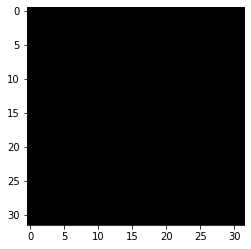

In [9]:
plt.imshow(min_im.astype('uint8'))

In [8]:
# from set_redundancy_compression import MMD_Decoder

# X_decoded = MMD_Decoder(Y, max_im, min_im)

In [14]:
def MMD_Decoder(Y, max_im, min_im):
    '''
    Function to decode the min-max differential 
    Input: Y - set of images encoded of shape N x H x W x C 
    Output: X - set of original images of shape N x H x W x C 
    '''

    X = (Y + min_im)*(2*Y < max_im - min_im) + (max_im - Y)*(2*Y > max_im - min_im)
    return X

In [15]:
X_decoded = MMD_Decoder(Y, max_im, min_im)

In [17]:
X

array([[[[158., 112.,  49.],
         [159., 111.,  47.],
         [165., 116.,  51.],
         ...,
         [137.,  95.,  36.],
         [126.,  91.,  36.],
         [116.,  85.,  33.]],

        [[152., 112.,  51.],
         [151., 110.,  40.],
         [159., 114.,  45.],
         ...,
         [136.,  95.,  31.],
         [125.,  91.,  32.],
         [119.,  88.,  34.]],

        [[151., 110.,  47.],
         [151., 109.,  33.],
         [158., 111.,  36.],
         ...,
         [139.,  98.,  34.],
         [130.,  95.,  34.],
         [120.,  89.,  33.]],

        ...,

        [[ 68., 124., 177.],
         [ 42., 100., 148.],
         [ 31.,  88., 137.],
         ...,
         [ 38.,  97., 146.],
         [ 13.,  64., 108.],
         [ 40.,  85., 127.]],

        [[ 61., 116., 168.],
         [ 49., 102., 148.],
         [ 35.,  85., 132.],
         ...,
         [ 26.,  82., 130.],
         [ 29.,  82., 126.],
         [ 20.,  64., 107.]],

        [[ 54., 107., 160.],
       

In [16]:
X_decoded == X

array([[[[False,  True,  True],
         [False,  True,  True],
         [False,  True,  True],
         ...,
         [False,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[False,  True,  True],
         [False,  True,  True],
         [False,  True,  True],
         ...,
         [False,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[False,  True,  True],
         [False,  True,  True],
         [False,  True,  True],
         ...,
         [False,  True,  True],
         [False,  True,  True],
         [ True,  True,  True]],

        ...,

        [[ True,  True, False],
         [ True,  True, False],
         [ True,  True, False],
         ...,
         [ True,  True, False],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True, False],
         [ True,  True, False],
         [ True,  True, False],
         ...,
         [ True,  True, False],
         [ T